In [9]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.cross_validation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
#because dataset is skewed we can try out logistic regression with balanced weights
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

In [10]:
%pylab inline

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split

try:
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
except ImportError:
    # use backports for sklearn 1.4
    # available from https://s3.amazonaws.com/datarobotblog/notebooks/sklearn_backports.py
    from sklearn_backports import PolynomialFeatures
    from sklearn_backports import make_pipeline

# ignore DeprecateWarnings by sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Import SciKit Learn functions
from sklearn.metrics import roc_curve, auc , roc_auc_score, confusion_matrix, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import grid_search
from sklearn.ensemble import GradientBoostingClassifier 

In [12]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_train.SeriousDlqin2yrs))
    plt.xticks(tick_marks, df_train.SeriousDlqin2yrs, rotation=45)
    plt.yticks(tick_marks, df_train.SeriousDlqin2yrs)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
df_train=pd.read_csv('train_ireg_amd_dmd.csv')
df_test=pd.read_csv('test_ireg_amd_dmd.csv')

In [14]:
df_train.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
5,5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0
6,6,0,0.305682,57,0,5710.000000,8738.957438,8,0,3,0,0.0
7,7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0
8,8,0,0.116951,27,0,46.000000,3045.627787,2,0,0,0,1.0
9,9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0


In [15]:
#Currently getting subset of data and just wrangling around and trying

Y_train=np.array(df_train.SeriousDlqin2yrs)
#features = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
#            'MonthlyIncome', 'age', 'NumberOfTimes90DaysLate']
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_train=np.array(df_train[features])

In [16]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25)

In [ ]:
parameters = { 
    'learning_rate': [0.01,],
    'n_estimators': [1500,2000,2200,2500,2700,3000,3200,3500,3700,4000],
    'max_depth': [1,2,3,4,5]
    }



In [17]:
#first randomly trying different models to check how it performs
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6).fit(X_train, Y_train)
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6).fit(X_train, Y_train)
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6).fit(X_train, Y_train)
model_200 = GradientBoostingClassifier(n_estimators=200, max_depth=6).fit(X_train, Y_train)
model_500 = GradientBoostingClassifier(n_estimators=500, max_depth=6).fit(X_train, Y_train)

In [28]:
print "validation set"
prob10=model_10.predict_proba(X_validation)
prob50=model_50.predict_proba(X_validation)
prob100=model_100.predict_proba(X_validation)
prob200=model_200.predict_proba(X_validation)
prob500=model_500.predict_proba(X_validation)

probs=[prob10[:,1],prob50[:,1],prob100[:,1],prob200[:,1],prob500[:,1]]
lst=[10,50,100,200,500]
auc_score1=roc_auc_score(Y_validation,prob[:,1])
print "Model 10: ",auc_score1
validation_errors =[]
for i in np.arange(0,5,1):
    
    auc_score1=roc_auc_score(Y_validation,probs[i])
    print lst[i]," : ",auc_score1
    validation_errors.append(1-auc_score1)

validation set
Model 10:  0.862266829773
10  :  0.862266829773
50  :  0.868298275261
100  :  0.868371186815
200  :  0.867521812026
500  :  0.863949362825


In [24]:
print X_validation.shape
print X_train.shape

(37500, 10)
(112500, 10)


In [27]:
print "train"
prob10=model_10.predict_proba(X_train)
prob50=model_50.predict_proba(X_train)
prob100=model_100.predict_proba(X_train)
prob200=model_200.predict_proba(X_train)
prob500=model_500.predict_proba(X_train)

probs=[prob10[:,1],prob50[:,1],prob100[:,1],prob200[:,1],prob500[:,1]]
lst=[10,50,100,200,500]
#auc_score1=roc_auc_score(Y_validation,prob[:,1])
#print "Model 10: ",auc_score1
training_errors=[]
for i in np.arange(0,5,1):
    
    auc_score1=roc_auc_score(Y_train,probs[i])
    print lst[i]," : ",auc_score1
    training_errors.append(1-auc_score1)


train
10  :  0.862865438583
50  :  0.877827698811
100  :  0.885108022919
200  :  0.898724337417
500  :  0.933819352502


In [29]:
#Visualizing Plots
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

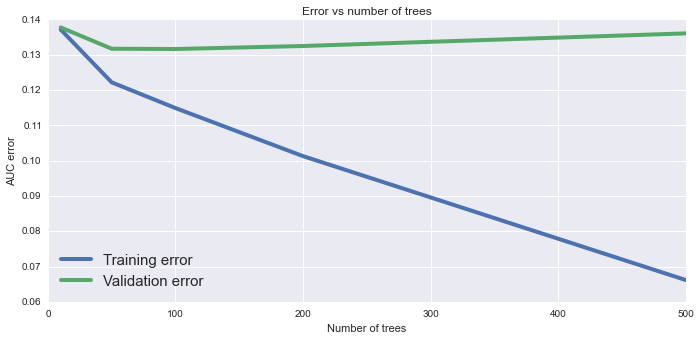

In [31]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='AUC error',
            legend='best')

In [34]:
print "depth 6: at some point it is getting overfit, train error has reduced quite a lot but validation error has started to increase"

depth 6: at some point it is getting overfit, train error has reduced quite a lot but validation error has started to increase


In [37]:
print "cross validation: "

parameters = { 
    'learning_rate': [0.05,0.01,0.1,0.2],
    'n_estimators': [10,100,500,1000,1500,2000,2100,2500,2700,3000],
    'max_depth': [1,3,5,6,7,9,11,13]
    }


boosting = grid_search.GridSearchCV(GradientBoostingClassifier(loss='deviance', max_features = 'auto'), parameters, n_jobs=-1,
                                   scoring='roc_auc',refit=True)

boosting.fit(X_train, Y_train)

tree_model = boosting.best_estimator_
#print (boosting.best_score_, gbm.best_params_) 



cross validation: 
